## Steps
#### 1) Get combinations of (M1,M2,M3) from "historical data" and their values of p1,p2...T1,T2...
#### 2) 

Last data file: outcome_0.9_0.5_0.5.csv
Combinations:  252


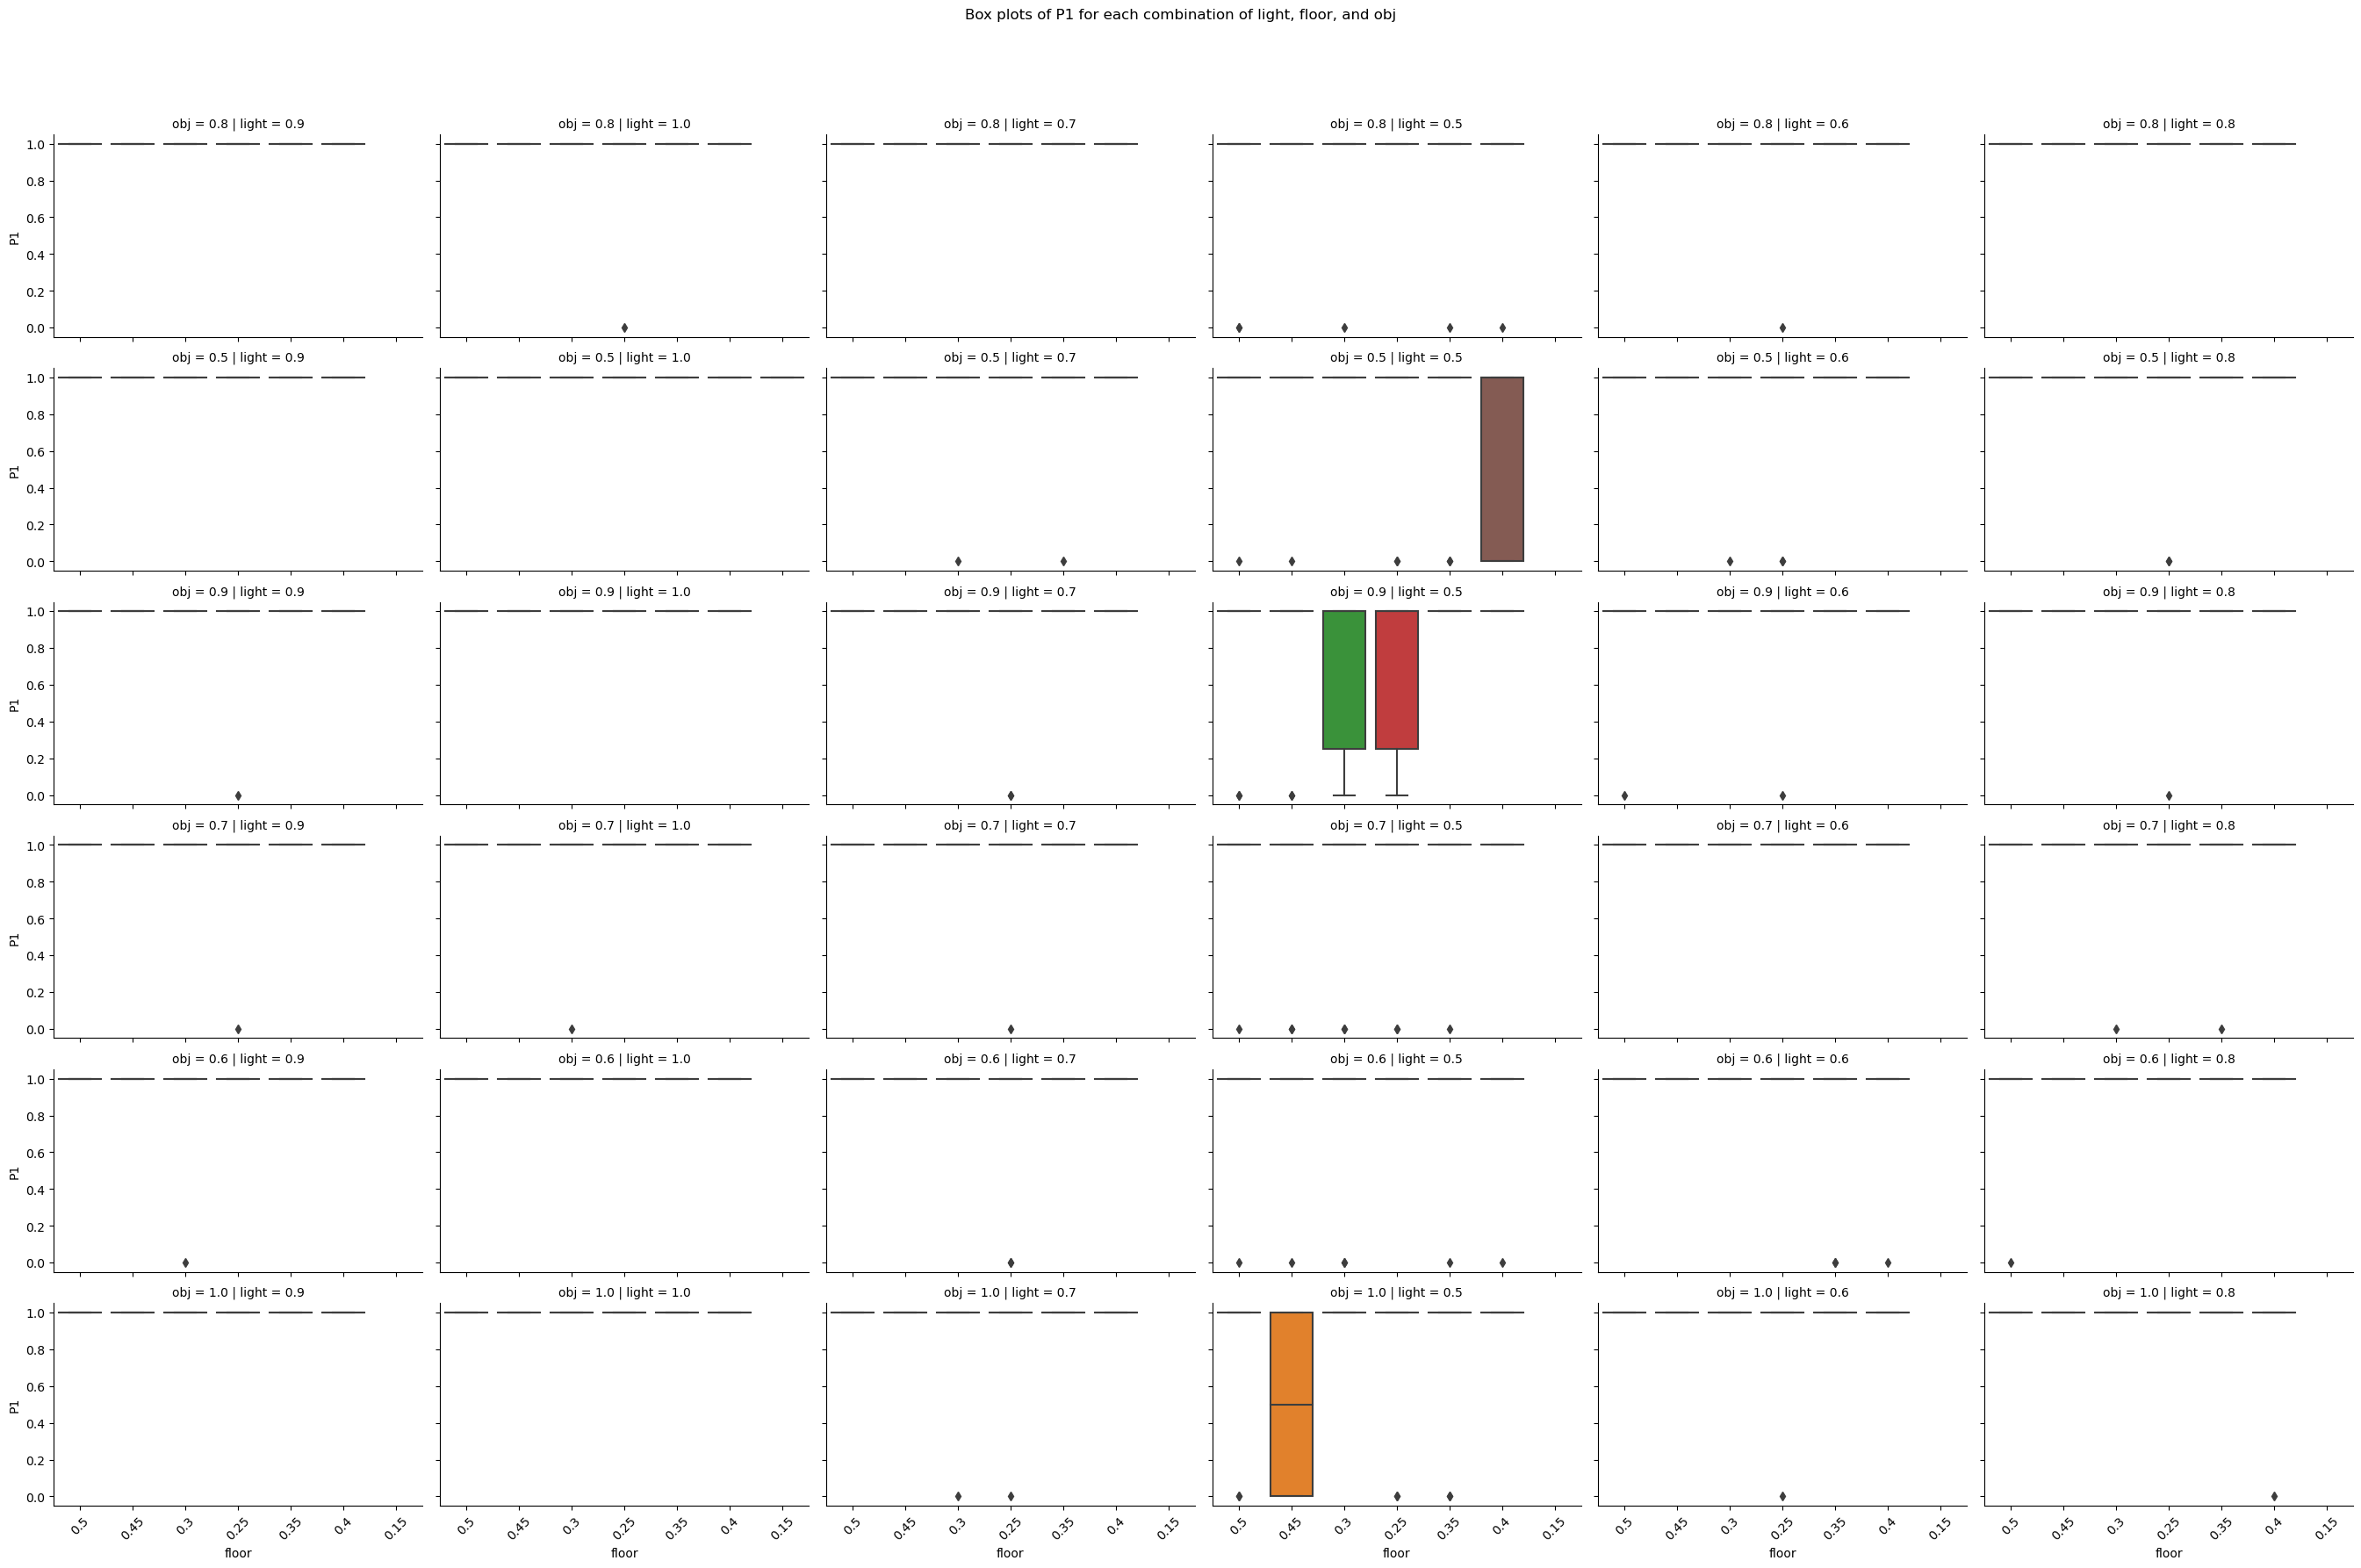

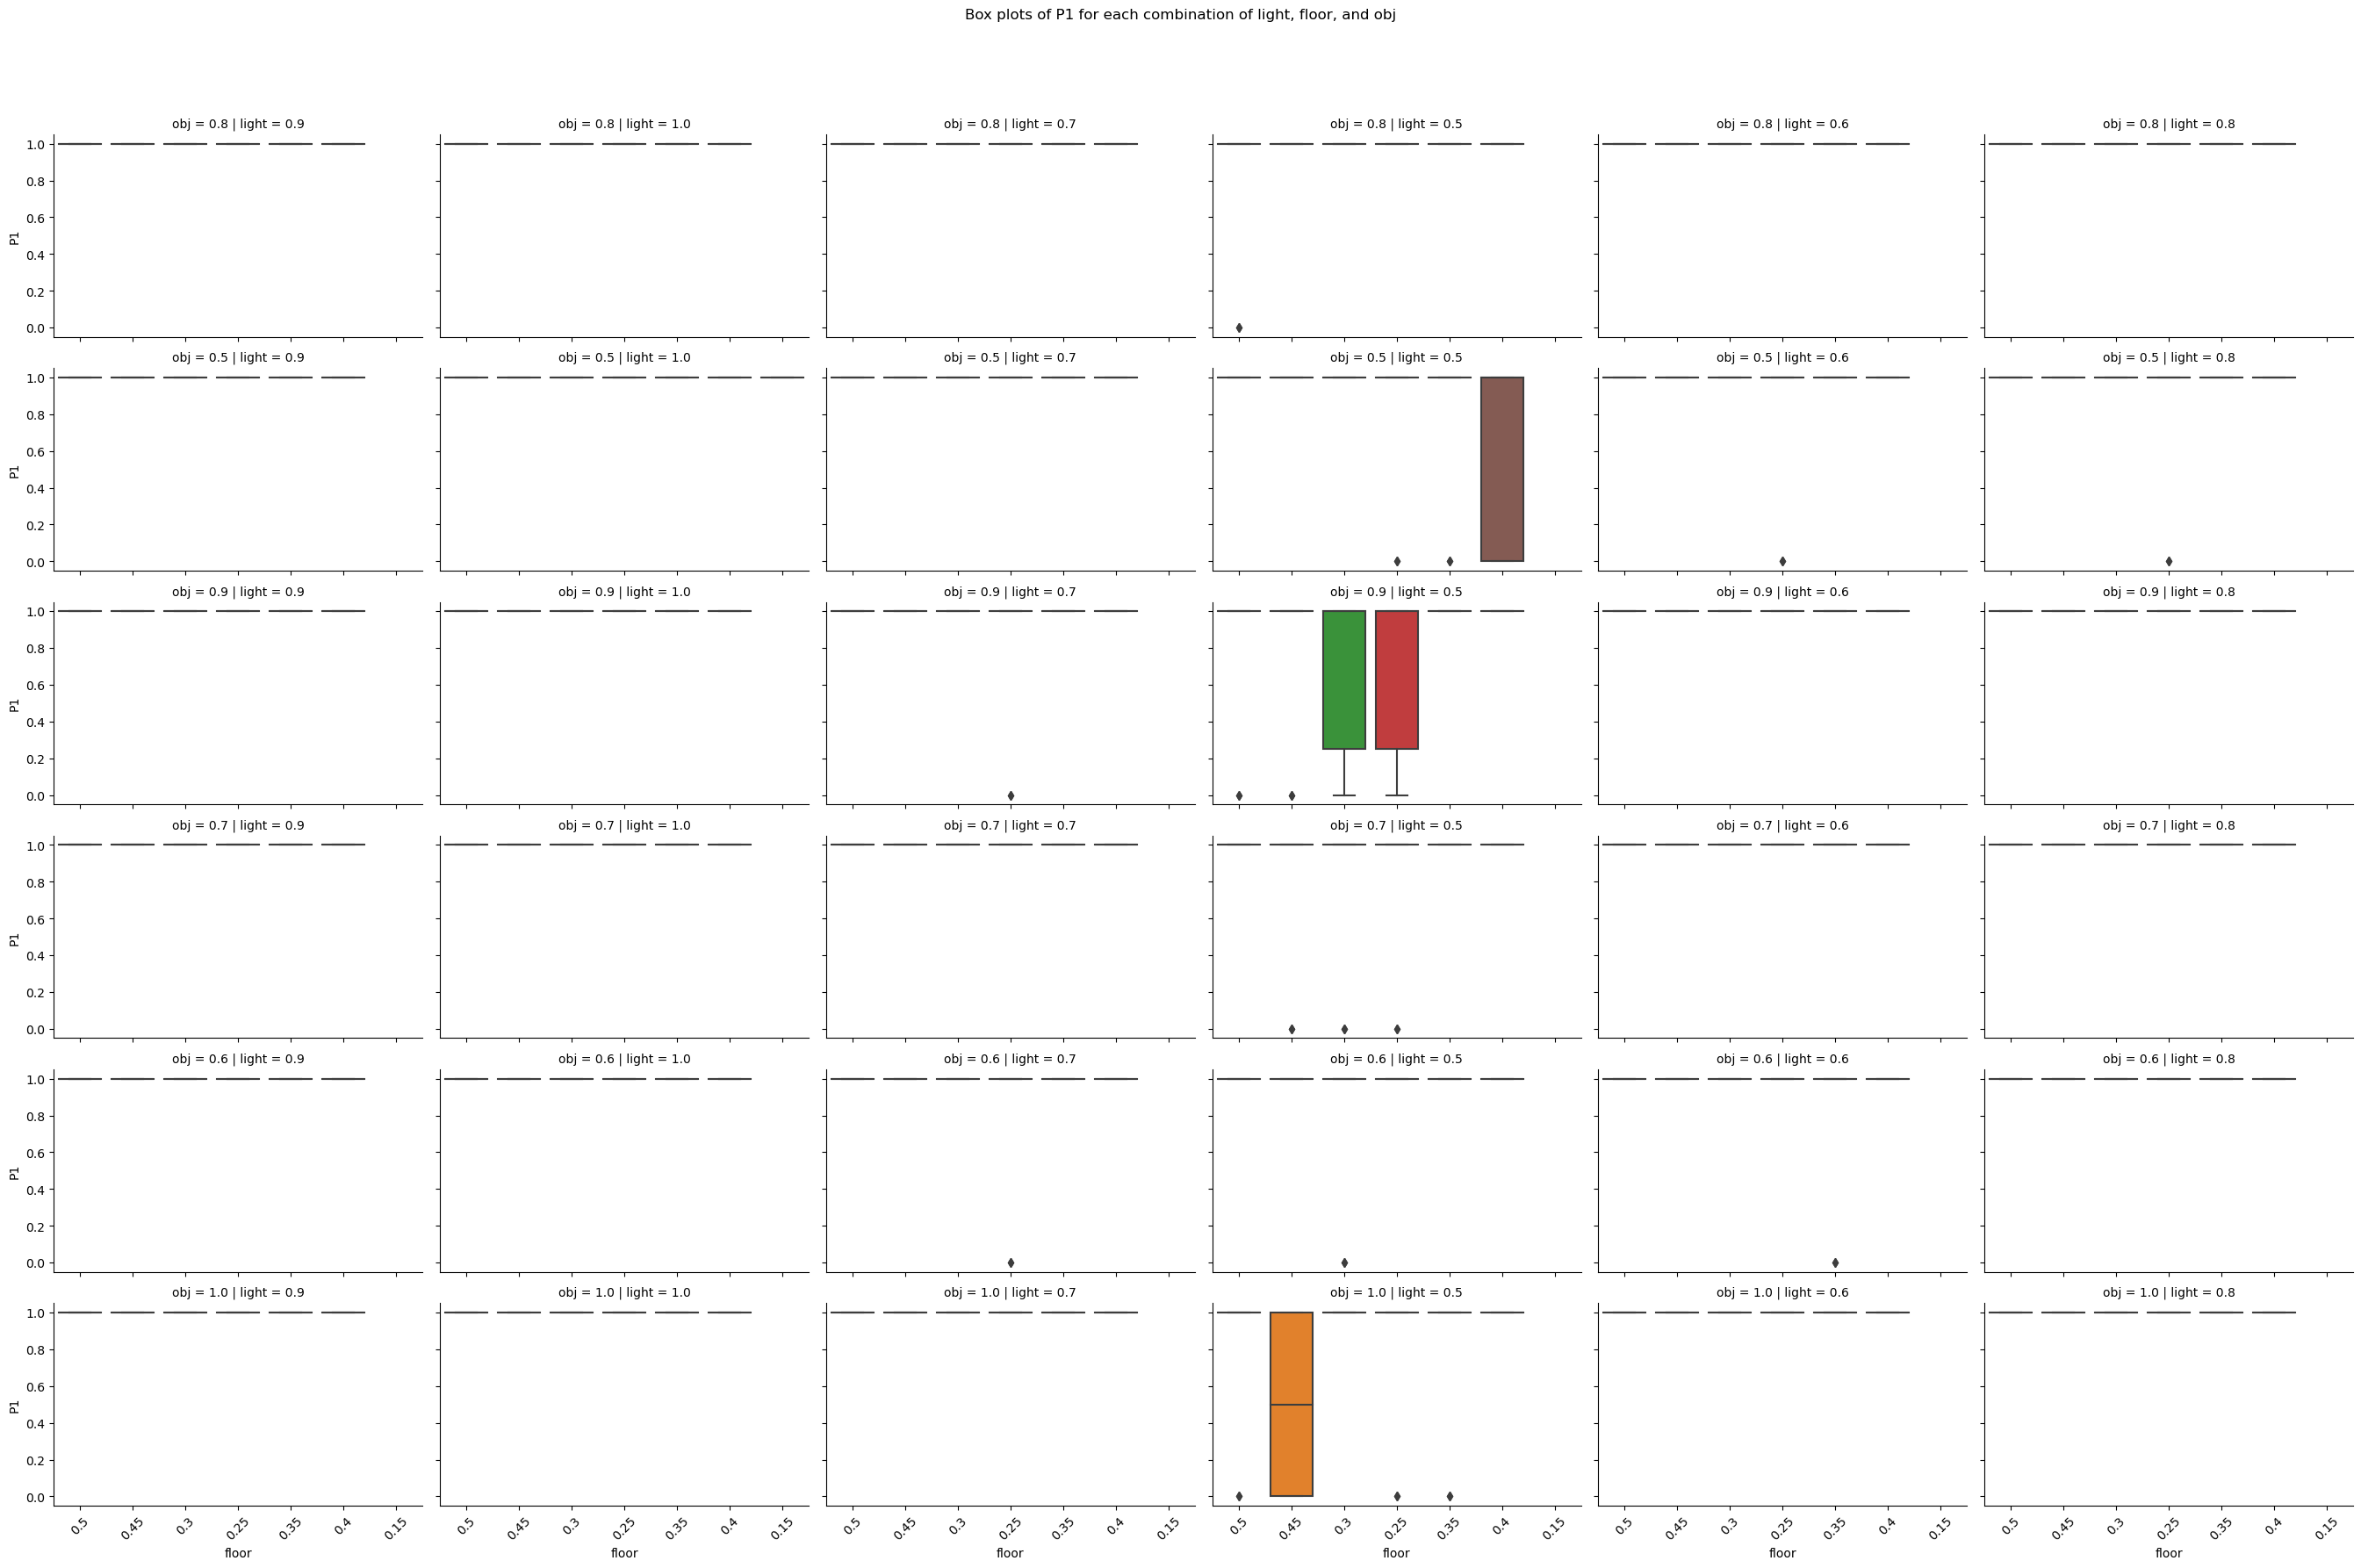

In [12]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def combineM1M2M3(folder):
    files = os.listdir(folder)  
    # Filter files that start with "outcome" and end with ".csv"
    outcome_files = [file for file in files if file.startswith("outcome") and file.endswith(".csv")]
    # List to hold all DataFrames
    df = []
    for file in outcome_files:
        file_path = os.path.join(folder, file)
        df1 = pd.read_csv(file_path)
        val= file.replace('.csv','').replace('outcome_','').split('_')
        df1['light']=val[0]
        df1['floor']=val[1]
        df1['obj']=val[2]
        df.append(df1)
    df = pd.concat(df, ignore_index=True)
    print(f"Last data file: {file}")
    return df

def saveDf(df,file):
    df.to_csv(file, index=False) 
    
def printCombinations(df):
    # Loop through every combination of "light", "floor", and "obj"
    count=0
    for light_val in df['light'].unique():
        for floor_val in df['floor'].unique():
            for obj_val in df['obj'].unique():
                count+=1;
    print("Combinations: ",count)


# Function to remove outliers based on quantile for each combination of "light", "floor", and "obj"
def smooth_outliers(df, column, lower_quantile5, upper_quantile):
    # Empty DataFrame to hold the filtered data
    filtered_data = pd.DataFrame()
    
    # Iterate over each unique combination of "light", "floor", and "obj"
    for light_val in df['light'].unique():
        for floor_val in df['floor'].unique():
            for obj_val in df['obj'].unique():
                # Filter the DataFrame for the current combination
                subset_df = df[(df['light'] == light_val) & (df['floor'] == floor_val) & (df['obj'] == obj_val)]
                
                if(len(subset_df[column].unique())==1):
                    filtered_data = pd.concat([filtered_data, subset_df])
                else:
                    # Remove outliers from the current subset using quantiles
                    lower_bound = subset_df[column].quantile(lower_quantile)
                    upper_bound = subset_df[column].quantile(upper_quantile)
                    filtered_subset = subset_df[(subset_df[column] >= lower_bound) & (subset_df[column] <= upper_bound)]
                    # Append the filtered subset to the overall filtered data
                    filtered_data = pd.concat([filtered_data, filtered_subset])
    return filtered_data

import seaborn as sns

def plotFacetGridBox(df,col):    
    # Use catplot to create a facet grid of box plots
    g = sns.catplot(x='floor', y=col, col='light', row='obj', kind='box', data=df, aspect=1.5, height=3)#, showfliers=False with no outliers plot
    # Rotate x-axis labels for better readability
    g.set_xticklabels(rotation=45)
    # Adjust spacing
    plt.subplots_adjust(top=0.9)
    g.fig.suptitle('Box plots of P1 for each combination of light, floor, and obj')
    plt.show()


    

lower_quantile=0.05; upper_quantile=0.95

df = combineM1M2M3("csv_files")
printCombinations(df)
saveDf(df,'allRawData.csv')
plotFacetGridBox(df,"P1")

dff = smooth_outliers(df, "P1", lower_quantile, upper_quantile)
saveDf(dff,'smooth.csv')
plotFacetGridBox(dff,"P1")

Last data file: outcome_0.9_0.5_0.5.csv
Combinations:  252


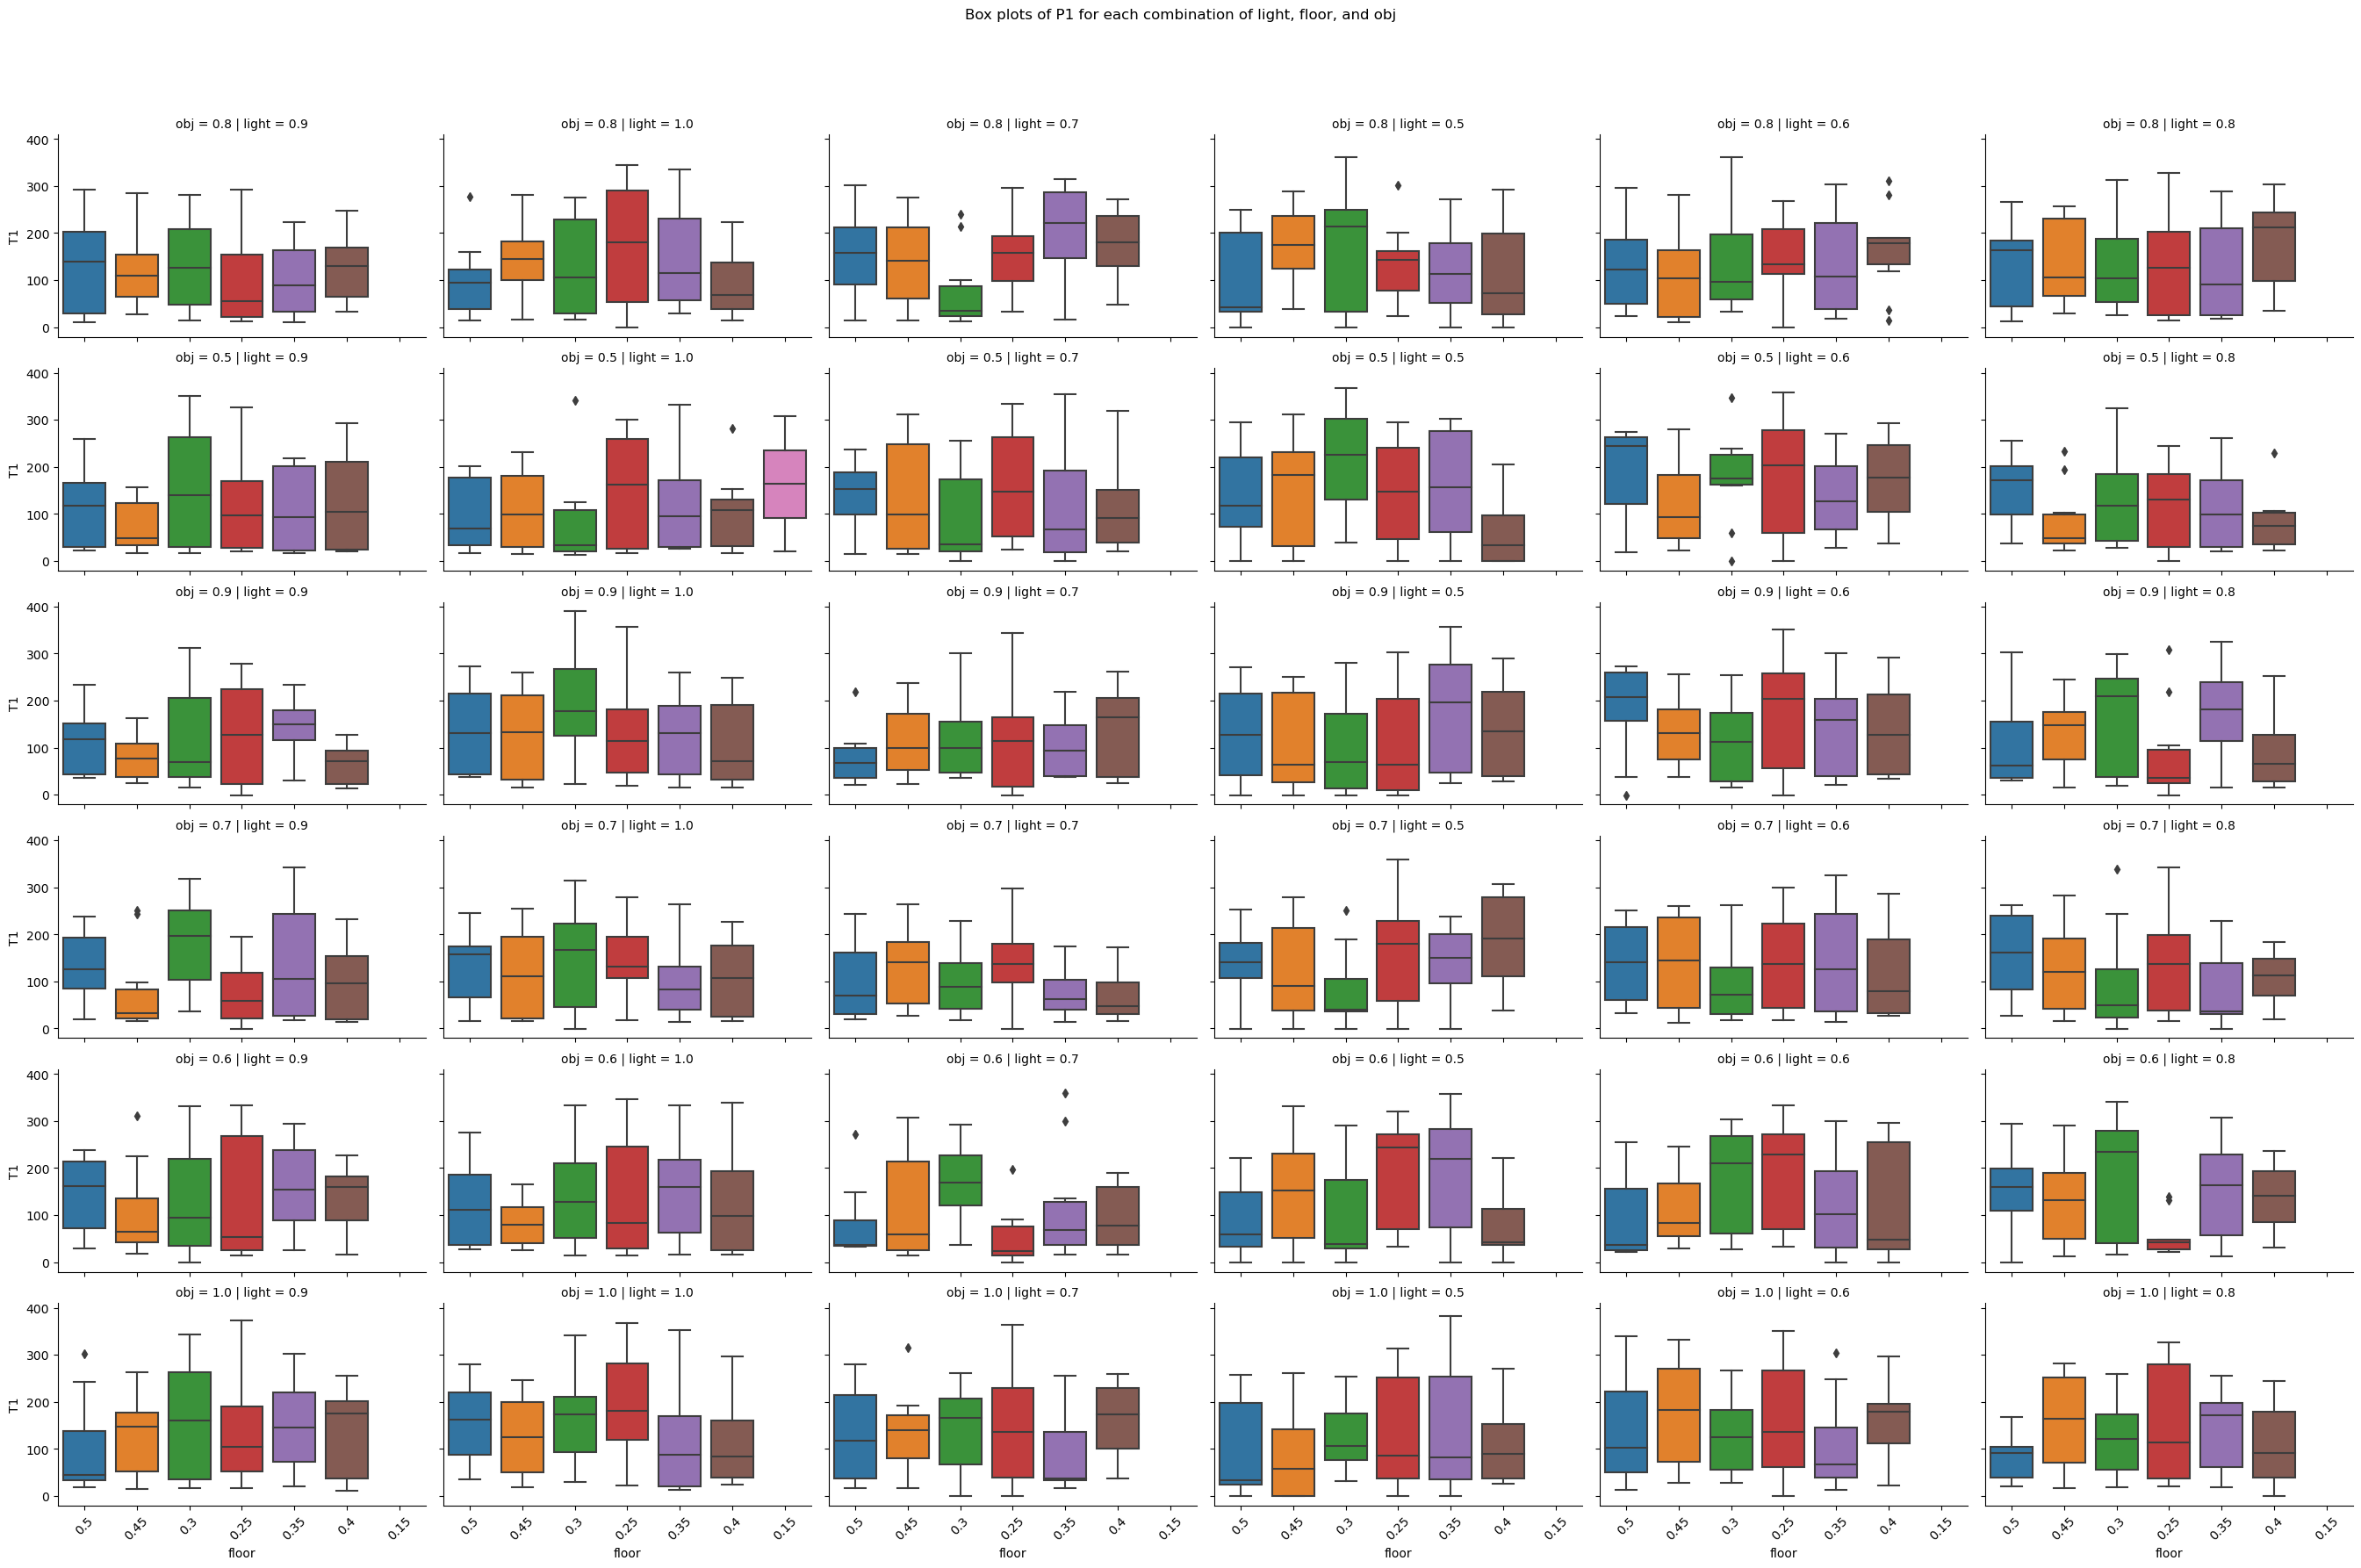

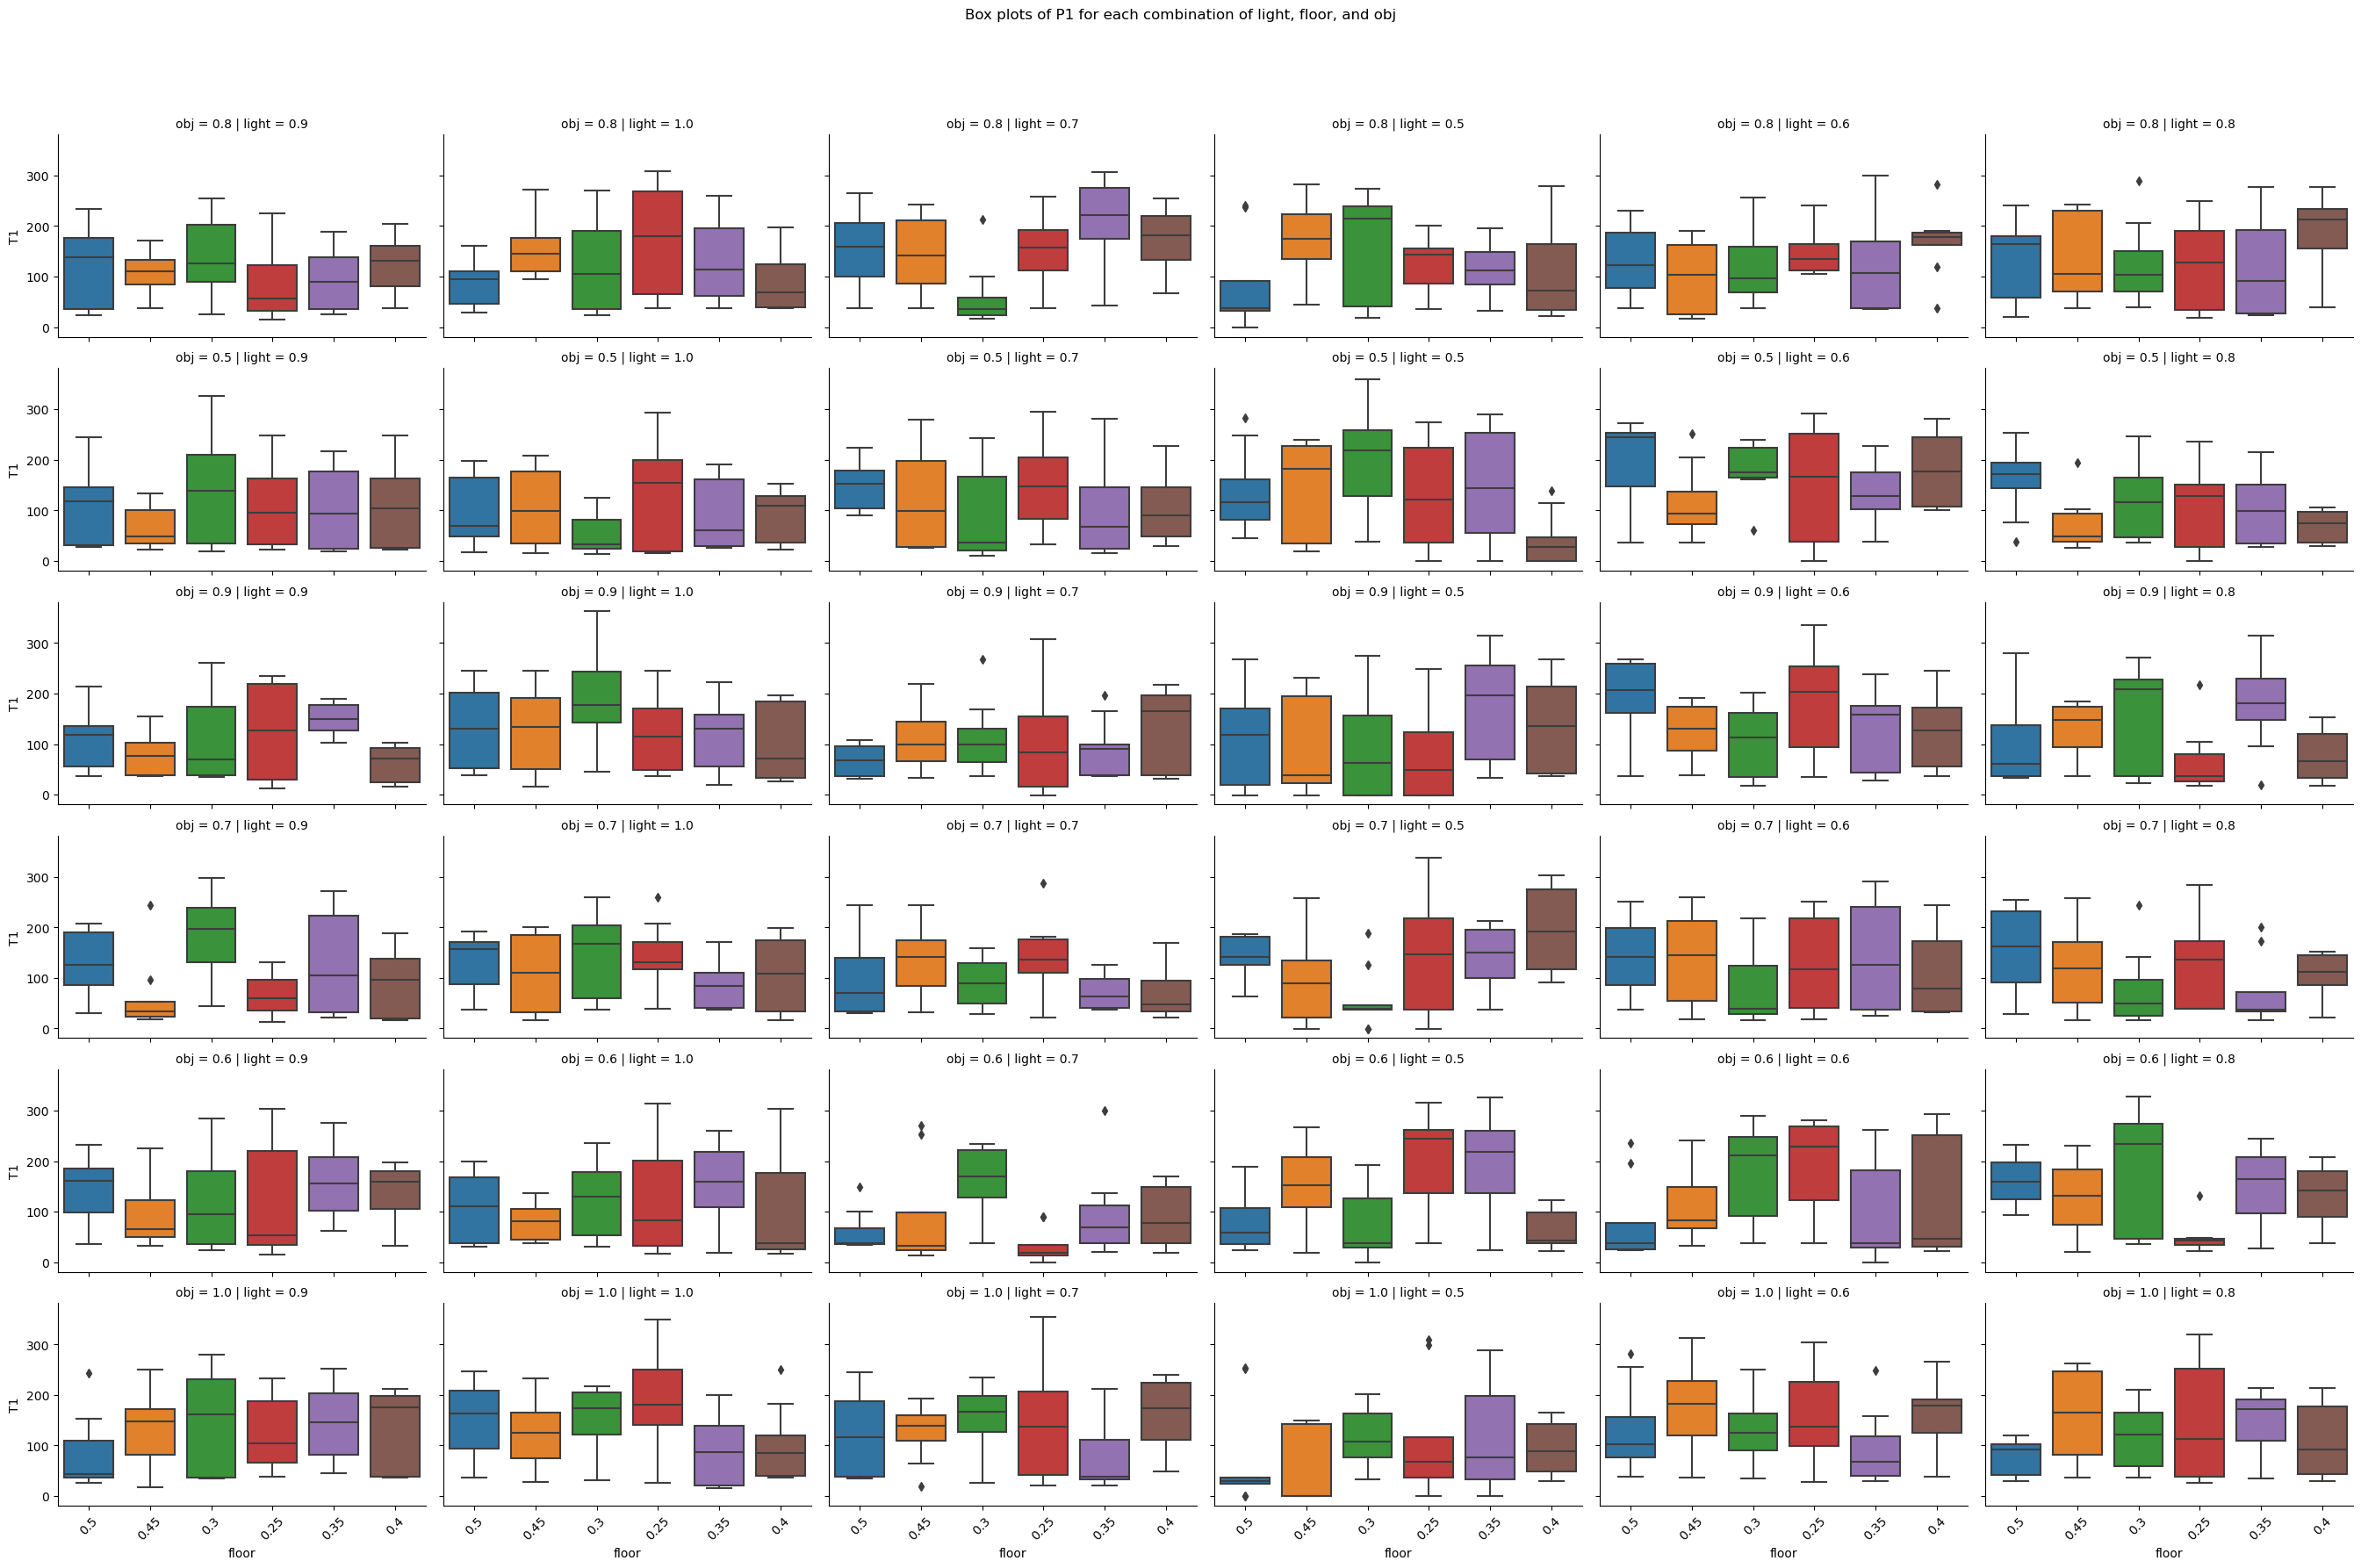

In [14]:
lower_quantile=0.05; upper_quantile=0.95

col="T1"

df = combineM1M2M3("csv_files")
printCombinations(df)
saveDf(df,'allRawData.csv')
plotFacetGridBox(df,col)

dff = smooth_outliers(df,col, lower_quantile, upper_quantile)
saveDf(dff,'smooth.csv')
plotFacetGridBox(dff,col)